<a href="https://colab.research.google.com/github/BhumikaAggwl/isro_task1_proj/blob/main/code_isro_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas astropy scikit-image matplotlib


Results saved to celestial_objects.csv


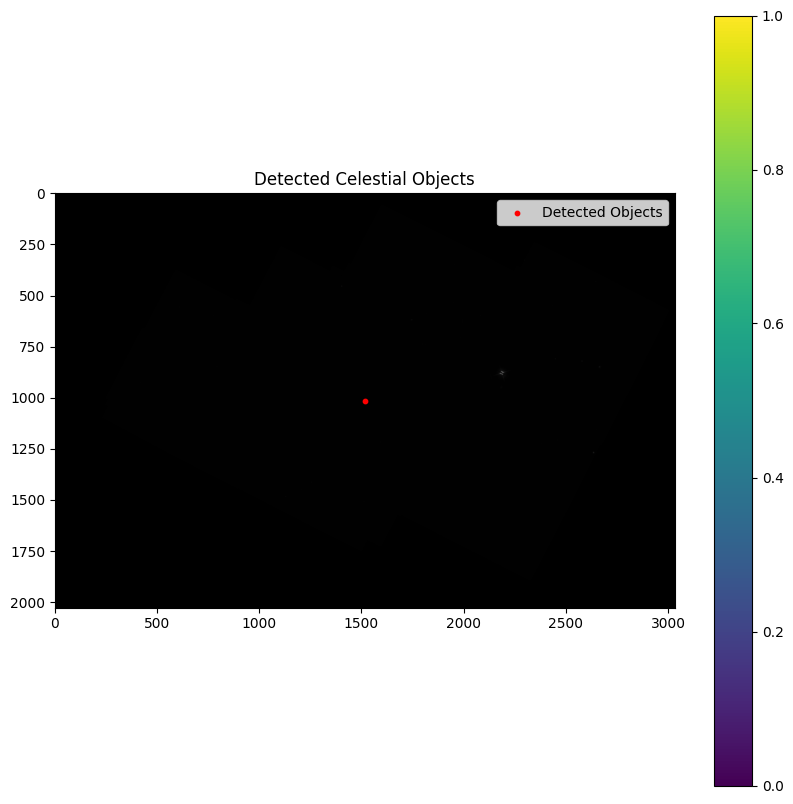

In [ ]:
import numpy as np
import pandas as pd
from astropy.io import fits
from skimage.feature import peak_local_max
from skimage.measure import regionprops, label
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

def process_fits(input_fits, output_csv):
    # Step 1: Read FITS file
    hdul = fits.open(input_fits)
    image_data = hdul[0].data
    hdul.close()

    # Step 2: Preprocessing - Thresholding
    threshold_value = threshold_otsu(image_data)
    binary_image = image_data > threshold_value

    # Label connected regions
    labeled_image = label(binary_image)

    # Step 3: Extract features
    properties = regionprops(labeled_image, intensity_image=image_data)
    object_data = []

    for i, prop in enumerate(properties):
        object_id = i + 1
        x, y = prop.centroid
        size = prop.area
        luminosity = prop.mean_intensity * prop.area  # Total intensity
        object_data.append([object_id, x, y, size, luminosity])

    # Convert to DataFrame
    df = pd.DataFrame(object_data, columns=["Object_ID", "X", "Y", "Size", "Luminosity"])

    # Step 4: Save results to CSV
    df.to_csv(output_csv, index=False)
    print(f"Results saved to {output_csv}")

    # Optional: Display the image and detected objects
    plt.figure(figsize=(10, 10))
    plt.imshow(image_data, cmap='gray')
    plt.scatter(df['Y'], df['X'], color='red', s=10, label="Detected Objects")
    plt.title("Detected Celestial Objects")
    plt.colorbar()
    plt.legend()
    plt.show()

# Modify paths for Colab or Jupyter Notebook
input_fits = "input.fits"  # Replace with your file path
output_csv = "celestial_objects.csv"  # Replace with desired output path

# Call the processing function directly
process_fits(input_fits, output_csv)

Results saved to classified_celestial_objects.csv


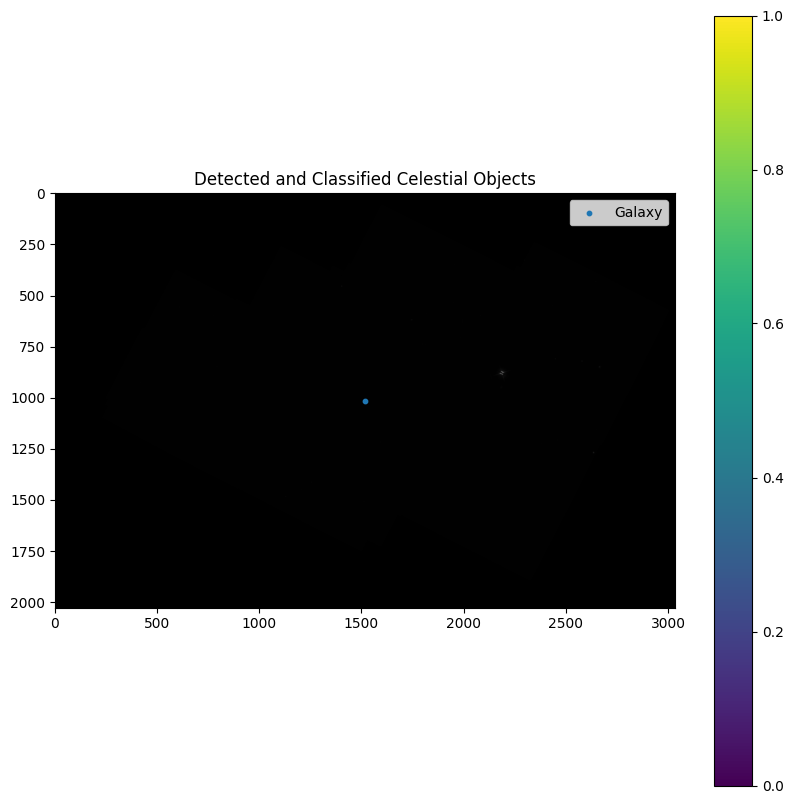

In [5]:
import numpy as np
import pandas as pd
from astropy.io import fits
from skimage.feature import peak_local_max
from skimage.measure import regionprops, label
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

def classify_objects(size, luminosity):
    """
    Classify celestial objects based on size and luminosity.
    Example thresholds (adjust based on data and domain knowledge):
    - Stars: Small, high luminosity
    - Galaxies: Large, medium luminosity
    - Planets: Small, low luminosity
    """
    if size < 50 and luminosity > 5000:
        return "Star"
    elif size > 200 and luminosity > 3000:
        return "Galaxy"
    elif size < 50 and luminosity < 5000:
        return "Planet"
    else:
        return "Unknown"

def process_fits(input_fits, output_csv):
    # Step 1: Read FITS file
    hdul = fits.open(input_fits)
    image_data = hdul[0].data
    hdul.close()

    # Step 2: Preprocessing - Thresholding
    threshold_value = threshold_otsu(image_data)
    binary_image = image_data > threshold_value

    # Label connected regions
    labeled_image = label(binary_image)

    # Step 3: Extract features
    properties = regionprops(labeled_image, intensity_image=image_data)
    object_data = []

    for i, prop in enumerate(properties):
        object_id = i + 1
        x, y = prop.centroid
        size = prop.area
        luminosity = prop.mean_intensity * prop.area  # Total intensity
        classification = classify_objects(size, luminosity)
        object_data.append([object_id, x, y, size, luminosity, classification])

    # Convert to DataFrame
    df = pd.DataFrame(object_data, columns=["Object_ID", "X", "Y", "Size", "Luminosity", "Classification"])

    # Step 4: Save results to CSV
    df.to_csv(output_csv, index=False)
    print(f"Results saved to {output_csv}")

    # Optional: Display the image and detected objects
    plt.figure(figsize=(10, 10))
    plt.imshow(image_data, cmap='gray')
    for _, row in df.iterrows():
        plt.scatter(row['Y'], row['X'], label=row['Classification'], s=10)
    plt.title("Detected and Classified Celestial Objects")
    plt.colorbar()
    plt.legend()
    plt.show()

# Modify paths for Colab or Jupyter Notebook
input_fits = "input.fits"  # Replace with your file path
output_csv = "classified_celestial_objects.csv"  # Replace with desired output path

# Call the processing function directly
process_fits(input_fits, output_csv)